## IMPORTING LIBRARIES

In [1]:
!pip install -U ipykernel

  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.21.1
    Uninstalling ipykernel-6.21.1:
      Successfully uninstalled ipykernel-6.21.1


In [2]:
!pip install -q streamlit

In [3]:
!pip install pyngrok

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("stock_data.csv")

## EDA

In [6]:
df.shape

(1994, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1994 non-null   int64  
 1   Date           1994 non-null   object 
 2   Open           1993 non-null   float64
 3   High           1993 non-null   float64
 4   Low            1993 non-null   float64
 5   Close          1993 non-null   float64
 6   Adj Close      1993 non-null   float64
 7   Volume         1993 non-null   float64
 8   No. of Shares  1994 non-null   int64  
 9   No. of Trades  1994 non-null   int64  
 10  Change(%)      1994 non-null   float64
dtypes: float64(7), int64(3), object(1)
memory usage: 171.5+ KB


In [8]:
df.head(10)

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,No. of Shares,No. of Trades,Change(%)
0,0,2015-01-01,438.988831,441.812073,437.676270,439.781311,417.988892,1367720.0,181432,9740,-0.0036
1,1,2015-01-02,439.880371,443.818054,437.998199,438.617340,416.882599,3383424.0,260835,19270,-0.0026
2,2,2015-01-05,438.344940,441.267212,432.946106,433.812897,412.316284,4662967.0,328788,39864,-0.0110
3,3,2015-01-06,430.915344,432.401276,412.093750,414.124512,393.603546,8596809.0,975422,26226,-0.0454
4,4,2015-01-07,414.619812,425.367950,414.570282,423.139069,402.171295,9562421.0,660342,24450,0.0218
5,5,2015-01-08,426.011841,427.398682,416.130493,417.071564,396.404510,9171029.0,787134,20043,-0.0143
6,6,2015-01-09,420.216766,426.952911,418.532715,426.110901,404.995911,6180769.0,510671,16807,0.0217
7,7,2015-01-12,426.209961,426.457611,416.848694,421.157837,400.288269,4661200.0,503008,12635,-0.0116
8,8,2015-01-13,422.495178,423.460999,416.303864,417.616425,396.922363,4591328.0,426946,17722,-0.0084
9,9,2015-01-14,417.542114,419.523346,411.697510,413.554901,393.062103,5251887.0,669183,22637,-0.0097


### VARIABLE DESCRIPTION
Date : The day an investor places the buy order in the market or an exchange.<br>
Open : Opening prices of a stock for a particular period of time.<br>
High : High price a stock attained for a particular period of time.<br>
Low : Low price a stock attained for a particular period of time.<br>
Close : Closing prices of a stock for a particular period of time.<br>
Adj Close : The closing price after adjustmentsfor all applicable splits and dividend distributions.<br>
Volume : The number of shares traded in a particular stock, index, or other investment over a specific period of time.<br>
No. of Shares : Units of equity ownership in a corporation. (Units of stocks).<br>
No. of Trades : Purchasing and selling stocks or other assets in a certain company.<br>
Change(%) : The difference/shift between the current price and the last trade of the previous day.

In [9]:
df.corr()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,No. of Shares,No. of Trades,Change(%)
Unnamed: 0,1.000000,0.966774,0.967207,0.966553,0.966905,0.967036,0.100678,-0.023836,0.351678,-0.007247
Open,0.966774,1.000000,0.999743,0.999741,0.999463,0.999457,0.066272,-0.034542,0.365258,-0.021778
High,0.967207,0.999743,1.000000,0.999682,0.999801,0.999789,0.075392,-0.034608,0.373499,-0.007662
Low,0.966553,0.999741,0.999682,1.000000,0.999775,0.999770,0.059724,-0.035090,0.358780,-0.009014
Close,0.966905,0.999463,0.999801,0.999775,1.000000,0.999990,0.068398,-0.034839,0.366882,0.003660
Adj Close,0.967036,0.999457,0.999789,0.999770,0.999990,1.000000,0.067688,-0.034816,0.366429,0.003365
Volume,0.100678,0.066272,0.075392,0.059724,0.068398,0.067688,1.000000,0.024979,0.731924,0.147141
No. of Shares,-0.023836,-0.034542,-0.034608,-0.035090,-0.034839,-0.034816,0.024979,1.000000,-0.006799,-0.000227
No. of Trades,0.351678,0.365258,0.373499,0.358780,0.366882,0.366429,0.731924,-0.006799,1.000000,0.084616
Change(%),-0.007247,-0.021778,-0.007662,-0.009014,0.003660,0.003365,0.147141,-0.000227,0.084616,1.000000


In [10]:
df.describe()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,No. of Shares,No. of Trades,Change(%)
count,1994.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1.993000e+03,1.994000e+03,1994.000000,1994.000000
mean,996.500000,1325.408942,1340.337026,1309.627319,1324.338416,1310.028971,9.065886e+06,1.208584e+06,15963.536610,0.001005
std,575.762538,756.093558,764.161654,747.138000,755.248519,759.572609,6.673385e+06,1.556644e+07,13699.099477,0.018416
min,0.000000,404.466064,405.010895,394.485657,401.568542,381.669708,7.871600e+05,4.245200e+04,2476.000000,-0.131500
25%,498.250000,532.056641,538.891846,528.143738,532.725281,517.503967,5.241641e+06,2.364888e+05,7634.000000,-0.009100
50%,996.500000,1183.679932,1203.591187,1165.947998,1181.401489,1166.302734,7.126831e+06,3.553470e+05,11815.500000,0.000700
75%,1494.750000,2061.949951,2089.800049,2035.000000,2057.800049,2047.086792,1.022708e+07,5.781165e+05,19149.250000,0.010800
max,1993.000000,2856.149902,2856.149902,2786.100098,2819.850098,2811.385742,6.584835e+07,3.973114e+08,113895.000000,0.147200


In [11]:
df.isna().sum()

Unnamed: 0       0
Date             0
Open             1
High             1
Low              1
Close            1
Adj Close        1
Volume           1
No. of Shares    0
No. of Trades    0
Change(%)        0
dtype: int64

In [12]:
data=df.dropna()

In [13]:
data.shape

(1993, 11)

## DATA VISUALIZATION

### Line plots

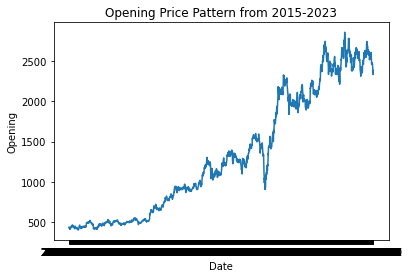

In [14]:
plt.plot(data['Date'],data['Open'])
plt.title('Opening Price Pattern from 2015-2023')
plt.xlabel('Date')
plt.ylabel('Opening')
plt.show()

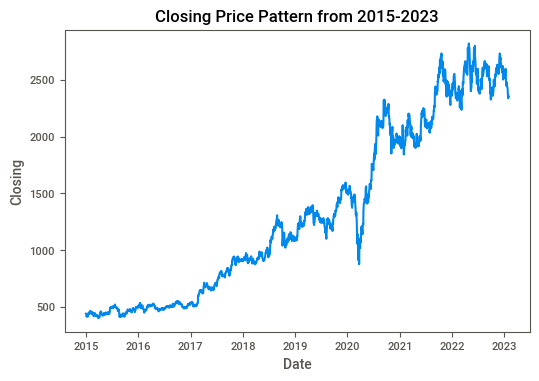

In [16]:
plt.plot(data['Date'],data['Close'])
plt.title('Closing Price Pattern from 2015-2023')
plt.xlabel('Date')
plt.ylabel('Closing')
plt.show()

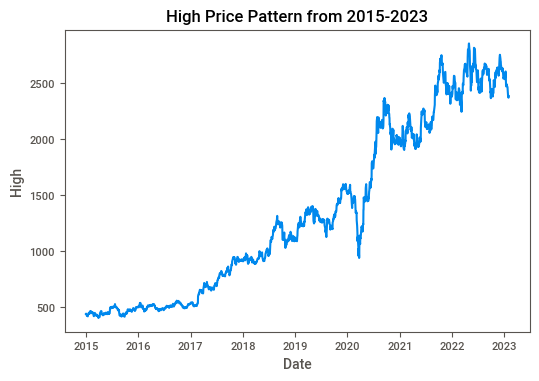

In [17]:
plt.plot(data['Date'],data['High'])
plt.title('High Price Pattern from 2015-2023')
plt.xlabel('Date')
plt.ylabel('High')
plt.show()

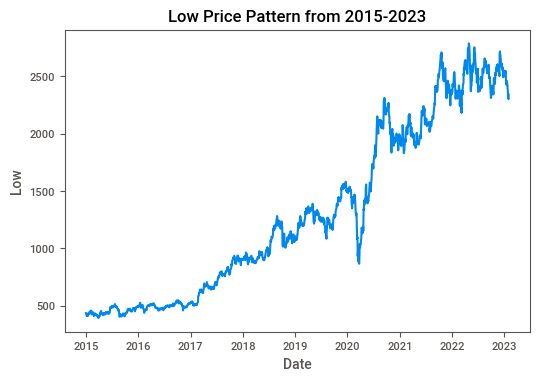

In [18]:
plt.plot(data['Date'],data['Low'])
plt.title('Low Price Pattern from 2015-2023')
plt.xlabel('Date')
plt.ylabel('Low')
plt.show()

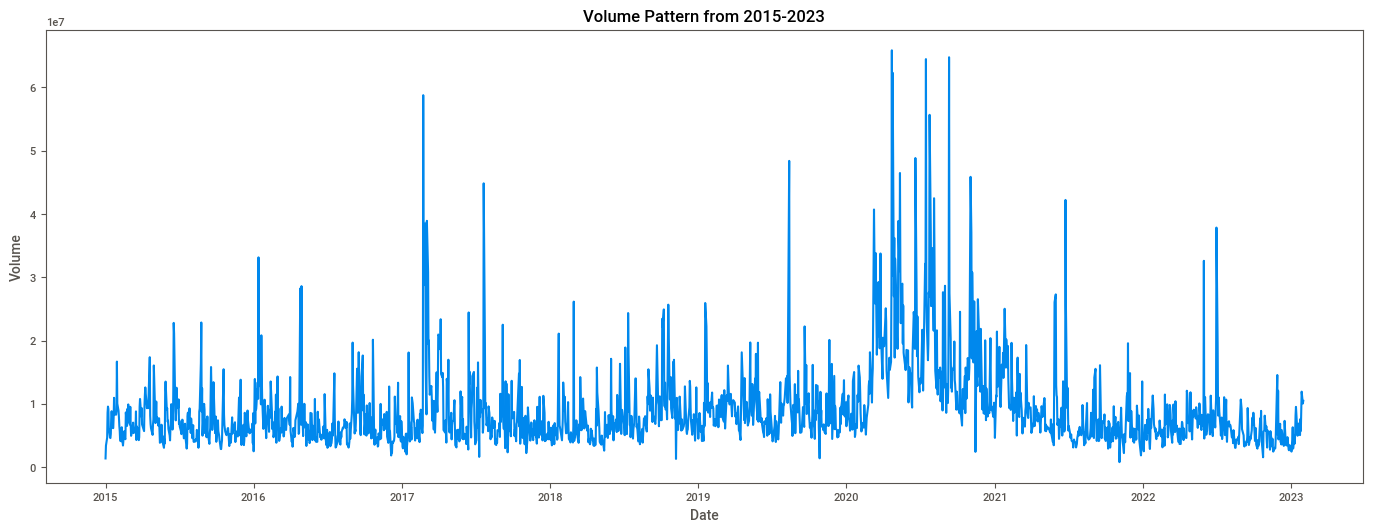

In [19]:
plt.figure(figsize=(17,6))
plt.plot(data['Date'],data['Volume'])
plt.title('Volume Pattern from 2015-2023')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

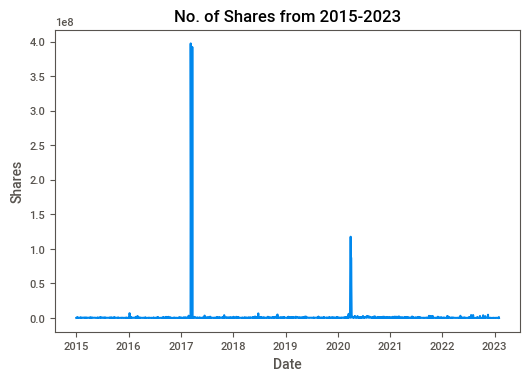

In [22]:
plt.plot(data['Date'],data['No. of Shares'])
plt.title('No. of Shares from 2015-2023')
plt.xlabel('Date')
plt.ylabel('Shares')
plt.show()

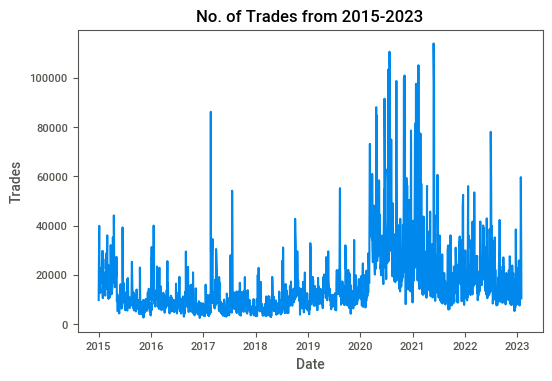

In [23]:
plt.plot(data['Date'],data['No. of Trades'])
plt.title('No. of Trades from 2015-2023')
plt.xlabel('Date')
plt.ylabel('Trades')
plt.show()

### Year and Month extraction

In [26]:
data["month"] = data.Date.dt.strftime("%b") 
data["year"] = data.Date.dt.strftime("%Y") 

### Boxplots

### Seasonality

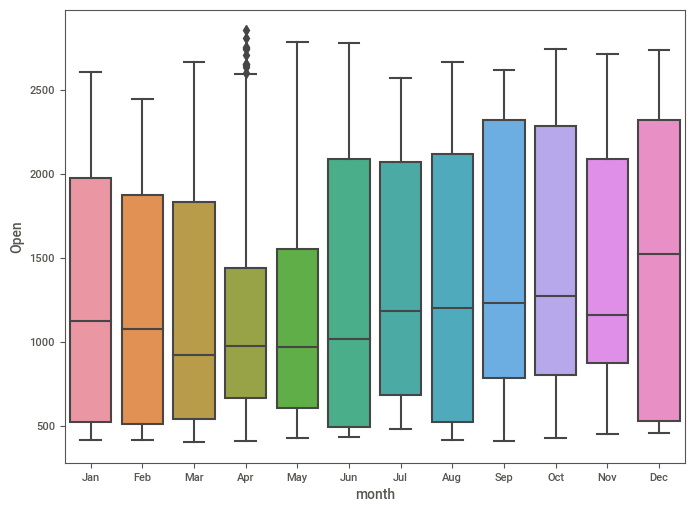

In [27]:
plt.figure(figsize=(8,6))
sns.boxplot(x="month",y="Open",data=data)
plt.show()

### Trend

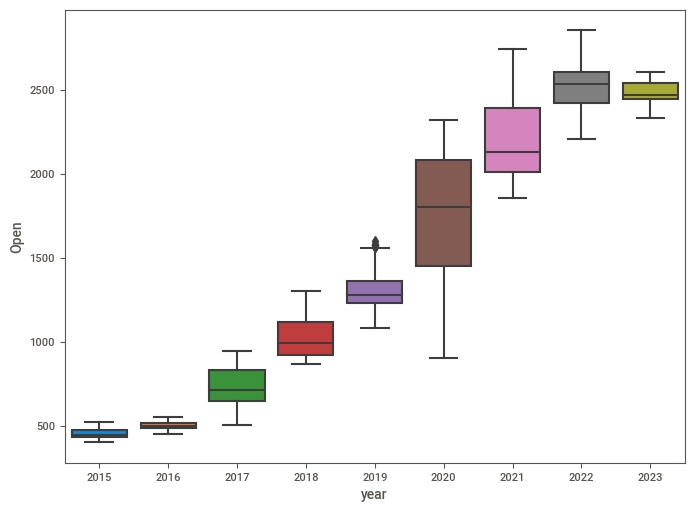

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(x="year",y="Open",data=data)
plt.show()

### Level

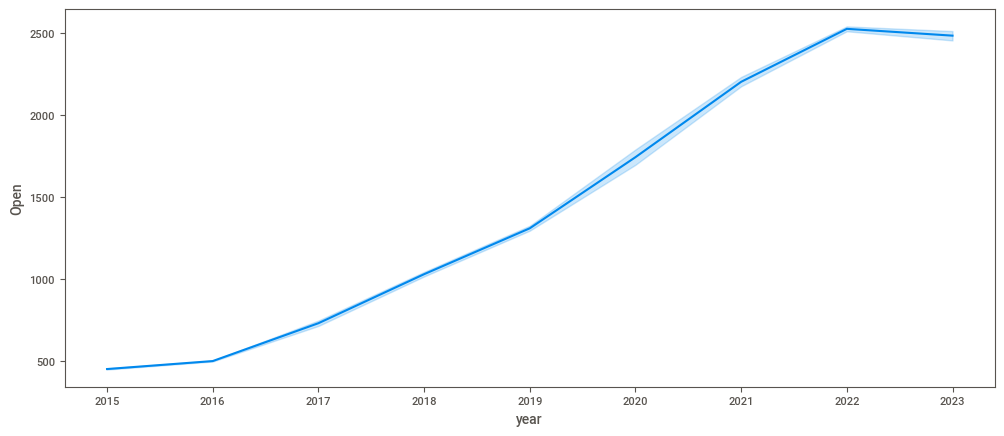

In [29]:
plt.figure(figsize=(12,5))
sns.lineplot(x="year",y="Open",data=data)
plt.show()

### Heatmap

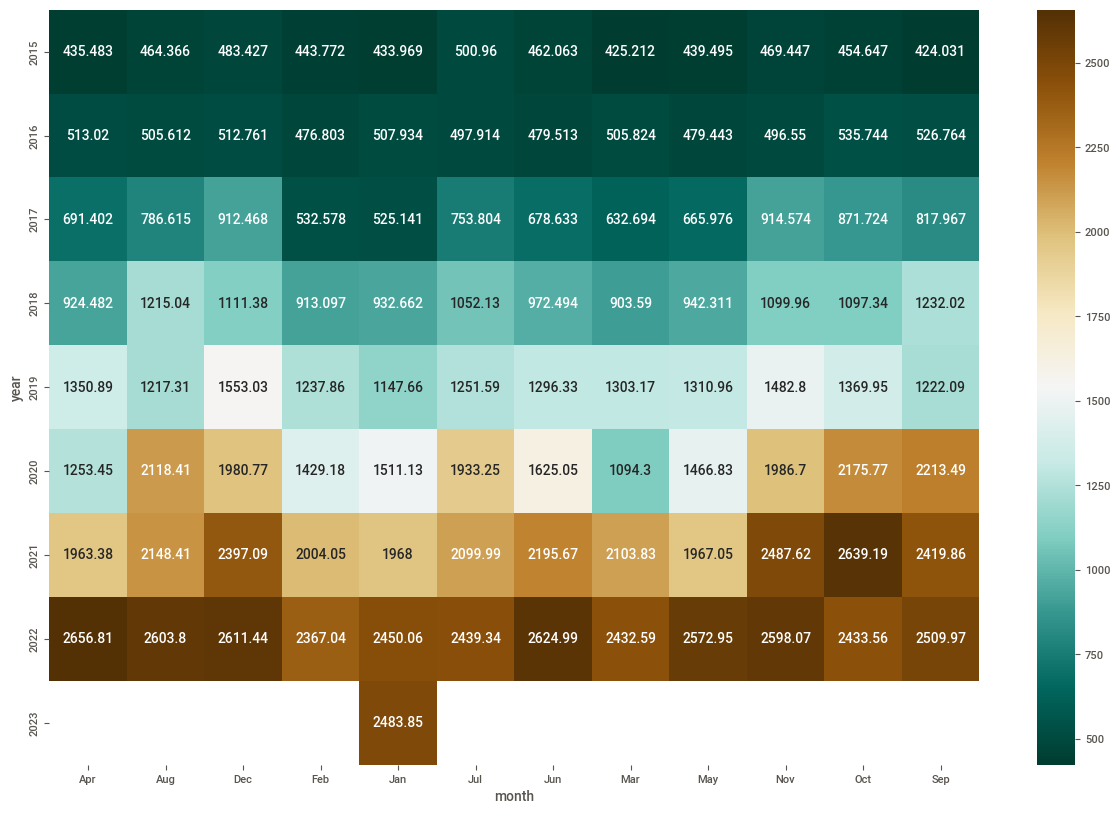

In [30]:
plt.figure(figsize=(15,10))
heatmap_y_month = pd.pivot_table(data=data,values="Open",index="year",columns="month",aggfunc="mean")
sns.heatmap(heatmap_y_month,annot=True,fmt="g",cmap='BrBG_r')
plt.show()